In [1]:
import mediapipe as mp
import cv2
import pandas as pd
import sklearn.metrics
import seaborn as sns
import os
import pathlib as Path

In [2]:
BaseOptions = mp.tasks.BaseOptions
GestureRecognizer = mp.tasks.vision.GestureRecognizer
GestureRecognizerOptions = mp.tasks.vision.GestureRecognizerOptions
VisionRunningMode = mp.tasks.vision.RunningMode

options = GestureRecognizerOptions(
    base_options=BaseOptions(model_asset_path='utils/gesture_recognizer.task'),
    running_mode=VisionRunningMode.IMAGE)

In [8]:
image_dir = "data/imagenes/test"

# Lista para almacenar resultados
test_results = []


for root, dirs, files in os.walk(image_dir):
    for file in files:
        # Crea la ruta completa al archivo
        file_path = os.path.join(root, file)
        
        # Verifica que sea un archivo válido
        if os.path.isfile(file_path):
            # La etiqueta es el nombre de la carpeta que contiene la imagen
            label = os.path.basename(root)  # Carpeta actual como la etiqueta
            
            # Procesa la imagen con el reconocedor de gestos
            with mp.tasks.vision.GestureRecognizer.create_from_options(options) as recognizer:
                try:
                    mp_image = mp.Image.create_from_file(str(file_path))
                    result = recognizer.recognize(mp_image)
                    if len(result.gestures) > 0:
                        pred = result.gestures[0][0].category_name or "n/a"
                    else:
                        pred = "empty"
                    
                    # Almacena los resultados: ruta del archivo, etiqueta y predicción
                    test_results.append((file_path, label, pred))
                except Exception as e:
                    print(f"Error processing file {file_path}: {e}")

# Crear un DataFrame de pandas con los resultados
results_df = pd.DataFrame(test_results, columns=["filename", "label", "pred"])

In [9]:
results_df

,filename,label,pred
0,data/imagenes/test\fist\0000 (1267).jpg,fist,fist
1,data/imagenes/test\fist\0000 (1268).jpg,fist,fist
2,data/imagenes/test\fist\0000 (1269).jpg,fist,fist
3,data/imagenes/test\fist\0000 (1270).jpg,fist,fist
4,data/imagenes/test\fist\0000 (1271).jpg,fist,fist
...,...,...,...
1041,data/imagenes/test\thumb up\00000000 (627).jpg,thumb up,thumb up
1042,data/imagenes/test\thumb up\00000000 (628).jpg,thumb up,thumb up
1043,data/imagenes/test\thumb up\00000000 (629).jpg,thumb up,thumb up
1044,data/imagenes/test\thumb up\00000000 (630).jpg,thumb up,thumb up


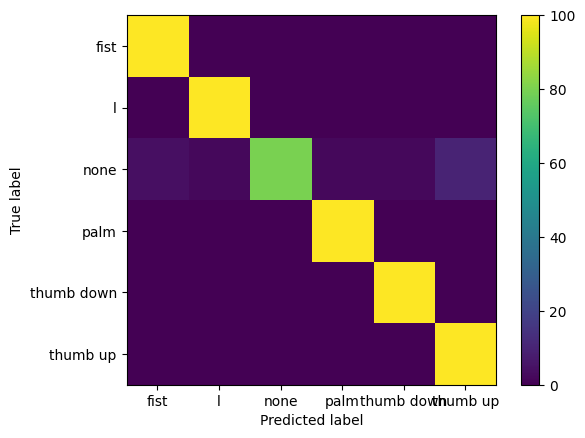

In [12]:
import sklearn.metrics

label_names = ['fist','l','thumb up','thumb down','palm','none']

classes = sorted(label_names)
cm = sklearn.metrics.confusion_matrix(
    results_df["label"], results_df["pred"], labels=classes, normalize="true"
)
sklearn.metrics.ConfusionMatrixDisplay(cm * 100, display_labels=classes).plot(
    include_values=False
)


In [13]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
y_true = results_df['label']
y_pred = results_df['pred']

accuracy = accuracy_score(y_true, y_pred)
precision = precision_score(y_true, y_pred, average='weighted', zero_division=1)
recall = recall_score(y_true, y_pred, average='weighted', zero_division=1)
f1 = f1_score(y_true, y_pred, average='weighted', zero_division=1)

# Imprimir métricas de clasificación
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-Score: {f1:.2f}")

Accuracy: 0.98
Precision: 0.99
Recall: 0.98
F1-Score: 0.98
